### Cleaning and merging data 
### Aggregate the data:

Count the number of EVs per state.

Count the number of charging stations per state.

Combine this with each state’s median household income.

In [53]:
import pandas as pd
import numpy as np

# Load datasets
ev = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\Electric_Vehicle_Population_Data.csv")
stations = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\alt_fuel_stations (Oct 12 2025).csv", low_memory=False)
income = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv")

# Check data shapes
print("EV dataset shape:", ev.shape)
print("Charging dataset shape:", stations.shape)
print("Income dataset shape:", income.shape)
print("EV Columns:", ev.columns.tolist())
print("Charging Columns:", stations.columns.tolist()[:10])   # only first 10
print("Income Columns:", income.columns.tolist()[:10])



EV dataset shape: (112634, 17)
Charging dataset shape: (83830, 75)
Income dataset shape: (57, 243)
EV Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
Charging Columns: ['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4', 'Station Phone', 'Status Code']
Income Columns: ['GEO_ID', 'NAME', 'S1903_C01_001E', 'S1903_C01_001M', 'S1903_C01_002E', 'S1903_C01_002M', 'S1903_C01_003E', 'S1903_C01_003M', 'S1903_C01_004E', 'S1903_C01_004M']


## EV Population Dataset

In [54]:
# === EV dataset cleaning ===
import pandas as pd

# Load your dataset
ev = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\Electric_Vehicle_Population_Data.csv")

# Clean column names
ev.columns = ev.columns.str.strip()

# Select important columns
ev = ev[['State', 'Model Year', 'Electric Range', 'Electric Vehicle Type']]

# Rename for consistency
ev = ev.rename(columns={
    'State': 'state',
    'Model Year': 'model_year',
    'Electric Range': 'electric_range',
    'Electric Vehicle Type': 'vehicle_type'
})

# Drop rows with missing states and duplicates
ev = ev.dropna(subset=['state'])
ev.drop_duplicates(inplace=True)

print("Cleaned EV dataset shape:", ev.shape)
print(ev.head())
print("Unique states:", ev['state'].nunique())
print(sorted(ev['state'].unique()))
ev_state = ev.groupby('state').size().reset_index(name='EV_Count')
print(ev_state.sort_values('EV_Count', ascending=False).head())

ev.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/ev_cleaned.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv'")



Cleaned EV dataset shape: (479, 4)
  state  model_year  electric_range                            vehicle_type
0    FL        2022              42  Plug-in Hybrid Electric Vehicle (PHEV)
1    NV        2013              38  Plug-in Hybrid Electric Vehicle (PHEV)
2    WA        2011              73          Battery Electric Vehicle (BEV)
3    WA        2017             238          Battery Electric Vehicle (BEV)
4    WA        2019              26  Plug-in Hybrid Electric Vehicle (PHEV)
Unique states: 45
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WY']
   state  EV_Count
42    WA       268
4     CA        38
41    VA        22
18    MD        21
39    TX        11
C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv'


### Charging Stations Dataset

In [55]:

import pandas as pd

# === Load Data ===
stations = pd.read_csv(
    r"C:\Users\palicher\Downloads\DATA\alt_fuel_stations (Oct 12 2025).csv",
    low_memory=False
)

# === Clean column names ===
stations.columns = stations.columns.str.strip()

print("Columns:", stations.columns.tolist())

# === Keep only electric charging stations ===
stations = stations[stations['Fuel Type Code'] == 'ELEC']

# === Select important columns ===
stations = stations[['State', 'Status Code', 'EV Connector Types', 'Access Days Time']]

# === Rename for consistency ===
stations = stations.rename(columns={
    'State': 'state',
    'Status Code': 'status',
    'EV Connector Types': 'connector_types',
    'Access Days Time': 'access_time'
})

# === Drop missing + duplicates ===
stations = stations.dropna(subset=['state'])
stations.drop_duplicates(inplace=True)

# === Keep only ACTIVE stations (Status 'E') ===
stations_active = stations[stations['status'] == 'E']

# === Aggregate: count active stations per state ===
stations_state = (
    stations_active.groupby('state')
    .size()
    .reset_index(name='station_count')
)

# === Inspect summary ===
print(" Total unique states with active stations:", stations_state['state'].nunique())

print("\n Top 10 states by active charging stations:")
print(stations_state.sort_values(by='station_count', ascending=False).head(10))

print("\n Bottom 10 states by active charging stations:")
print(stations_state.sort_values(by='station_count', ascending=True).head(10))



stations_state.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/stations_state.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed/stations_state.csv'")





Columns: ['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4', 'Station Phone', 'Status Code', 'Expected Date', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network', 'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name', 'Open Date', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 'EV Connector Types', 'Country', 'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)', 'Groups With Access Code (French)', 'Hydrogen Is Retail', 'Access Code', 'Access Detail Code', 'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num', 'CNG On-Site Renewable Source', 'CNG Total Compression Capacity', 'CNG Storage Capacity', 

## Income dataset

In [56]:
import pandas as pd

# Reload fresh
income = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv")

print("=== Columns ===")
for col in income.columns:
    print(f"[{col}]")

print("\n=== First 10 rows ===")
print(income.head(10))





=== Columns ===
[GEO_ID]
[NAME]
[S1903_C01_001E]
[S1903_C01_001M]
[S1903_C01_002E]
[S1903_C01_002M]
[S1903_C01_003E]
[S1903_C01_003M]
[S1903_C01_004E]
[S1903_C01_004M]
[S1903_C01_005E]
[S1903_C01_005M]
[S1903_C01_006E]
[S1903_C01_006M]
[S1903_C01_007E]
[S1903_C01_007M]
[S1903_C01_008E]
[S1903_C01_008M]
[S1903_C01_009E]
[S1903_C01_009M]
[S1903_C01_010E]
[S1903_C01_010M]
[S1903_C01_011E]
[S1903_C01_011M]
[S1903_C01_012E]
[S1903_C01_012M]
[S1903_C01_013E]
[S1903_C01_013M]
[S1903_C01_014E]
[S1903_C01_014M]
[S1903_C01_015E]
[S1903_C01_015M]
[S1903_C01_016E]
[S1903_C01_016M]
[S1903_C01_017E]
[S1903_C01_017M]
[S1903_C01_018E]
[S1903_C01_018M]
[S1903_C01_019E]
[S1903_C01_019M]
[S1903_C01_020E]
[S1903_C01_020M]
[S1903_C01_021E]
[S1903_C01_021M]
[S1903_C01_022E]
[S1903_C01_022M]
[S1903_C01_023E]
[S1903_C01_023M]
[S1903_C01_024E]
[S1903_C01_024M]
[S1903_C01_025E]
[S1903_C01_025M]
[S1903_C01_026E]
[S1903_C01_026M]
[S1903_C01_027E]
[S1903_C01_027M]
[S1903_C01_028E]
[S1903_C01_028M]
[S1903_C01_029E]

In [57]:
# Try reading while skipping metadata rows
income = pd.read_csv(
    r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv",
    skiprows=1,  # skip top line (metadata)
    low_memory=False
)
print(income.head(10))
print(income.columns.tolist())
[col for col in income.columns if "Median income" in col]



     Geography  Geographic Area Name  \
0  0400000US01               Alabama   
1  0400000US02                Alaska   
2  0400000US04               Arizona   
3  0400000US05              Arkansas   
4  0400000US06            California   
5  0400000US08              Colorado   
6  0400000US09           Connecticut   
7  0400000US10              Delaware   
8  0400000US11  District of Columbia   
9  0400000US12               Florida   

   Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households  \
0                                            2059528                                                     
1                                             274045                                                     
2                                            2982475                                                     
3                                            1246754                                                     
4                            

['Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Ameri

In [ ]:





# === Clean Column Names ===
income.columns = income.columns.str.strip()

# === Automatically Detect Columns ===
# This ensures flexibility in case of slight column name differences
name_col = [c for c in income.columns if "Geographic Area Name" in c][0]
income_col = [c for c in income.columns if "Median income" in c][0]

print("Detected columns:")
print("State column:", name_col)
print("Income column:", income_col)

# === Select and Rename Columns ===
income = income[[name_col, income_col]]
income = income.rename(columns={
    name_col: 'state',
    income_col: 'median_income'
})

# === Clean Numeric Values ===
income['median_income'] = (
    income['median_income']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)
income['median_income'] = pd.to_numeric(income['median_income'], errors='coerce')

# === Drop Missing or Invalid Rows ===
income = income.dropna(subset=['median_income']).sort_values(by='state').reset_index(drop=True)

# === Optional: Aggregate by State (safety step) ===
income_state = (
    income.groupby('state', as_index=False)['median_income']
    .mean()
    .sort_values(by='state')
    .reset_index(drop=True)
)

# === Display Summary ===
print(" Cleaned Income dataset shape:", income_state.shape)
print(income_state.head(10))

# === Save Cleaned File ===
income_state.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv'")



import us

# Function to safely convert full state names to abbreviations
def to_abbrev(state_name):
    state = us.states.lookup(state_name)
    if state:
        return state.abbr
    else:
        return state_name  # keep as is if already an abbreviation or not found

# Apply conversion
income_state['state'] = income_state['state'].apply(to_abbrev)

# Make sure everything is uppercase and clean
income_state['state'] = income_state['state'].str.strip().str.upper()

print("After conversion — unique values in income_state:")
print(income_state['state'].unique()[:10])




Detected columns:
State column: Geographic Area Name
Income column: Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households
 Cleaned Income dataset shape: (56, 2)
                  state  median_income
0               Alabama        66659.0
1                Alaska        95665.0
2               Arizona        81486.0
3              Arkansas        62106.0
4            California       100149.0
5              Colorado        97113.0
6           Connecticut        96049.0
7              Delaware        87534.0
8  District of Columbia       109707.0
9               Florida        77735.0
C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv'


✅ After conversion — unique values in income_state:
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DISTRICT OF COLUMBIA' 'FL']


Clean the state columns and filter only us state just incase

In [59]:
# Make state column consistent (trim and uppercase)
ev_state['state'] = ev_state['state'].str.strip().str.upper()
stations_state['state'] = stations_state['state'].str.strip().str.upper()
income_state['state'] = income_state['state'].str.strip().str.upper()
valid_states = ev_state['state'].unique()
income_state = income_state[income_state['state'].isin(valid_states)]


# Merge all data sets 

In [60]:
merged_df = (
    ev_state
    .merge(stations_state, on='state', how='inner')
    .merge(income_state, on='state', how='inner')
)

print("Final merged dataset shape:", merged_df.shape)
print(merged_df.head(10))

merged_df.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/ev_charging_income_state.csv", index=False)
print("Final merged dataset saved successfully!")



Final merged dataset shape: (44, 4)
  state  EV_Count  station_count  median_income
0    AK         1             25        95665.0
1    AL         1             49        66659.0
2    AR         4             49        62106.0
3    AZ         5             92        81486.0
4    CA        38            592       100149.0
5    CO         8            132        97113.0
6    CT         6            114        96049.0
7    DE         1             34        87534.0
8    FL         4            165        77735.0
9    GA         7            106        79991.0
Final merged dataset saved successfully!


# EDA

In [62]:
# ===  Exploratory Data Analysis (EDA) ===

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged dataset (if not already in memory)
merged_df = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv")

# Quick check
print(" Merged dataset shape:", merged_df.shape)
print(merged_df.head())

# Basic statistical overview
print("\n Summary statistics:")
print(merged_df.describe())

# Correlation matrix
print("\n Correlation between EVs, stations, and income:")
print(merged_df[['EV_Count', 'station_count', 'median_income']].corr(numeric_only=True))


 Merged dataset shape: (44, 4)
  state  EV_Count  station_count  median_income
0    AK         1             25        95665.0
1    AL         1             49        66659.0
2    AR         4             49        62106.0
3    AZ         5             92        81486.0
4    CA        38            592       100149.0

 Summary statistics:
         EV_Count  station_count  median_income
count   44.000000      44.000000      44.000000
mean    10.750000      91.840909   81964.295455
std     40.265471      89.003251   12615.851848
min      1.000000      20.000000   59127.000000
25%      1.000000      42.750000   73556.000000
50%      3.000000      75.500000   79856.000000
75%      5.250000     128.250000   92983.750000
max    268.000000     592.000000  104828.000000

 Correlation between EVs, stations, and income:
               EV_Count  station_count  median_income
EV_Count       1.000000       0.198273       0.278443
station_count  0.198273       1.000000       0.352900
median_income  0

# Bar Chart — Top 10 States by EV Adoption

C:\Users\palicher\AppData\Local\Temp\ipykernel_6464\1697340965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='state', y='EV_Count', palette='crest')


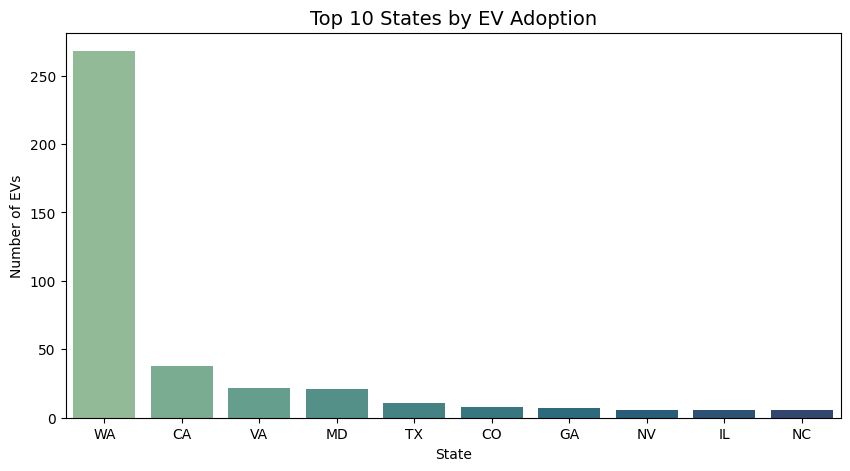

In [63]:
plt.figure(figsize=(10,5))
top10 = merged_df.sort_values(by='EV_Count', ascending=False).head(10)
sns.barplot(data=top10, x='state', y='EV_Count', palette='crest')
plt.title('Top 10 States by EV Adoption', fontsize=14)
plt.xlabel('State')
plt.ylabel('Number of EVs')
plt.show()


# Scatter Plot — Income vs EV Adoption

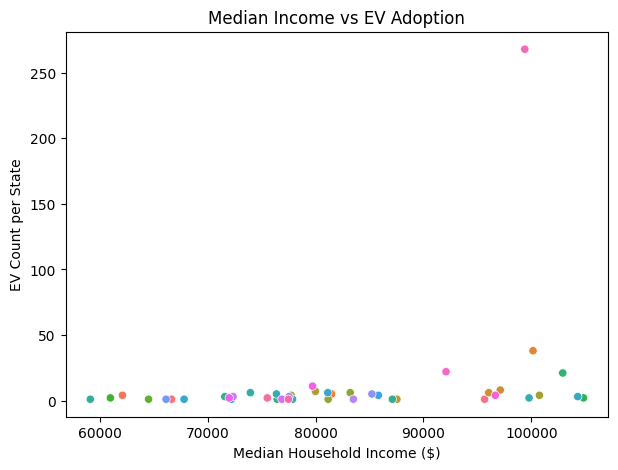

In [64]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged_df, x='median_income', y='EV_Count', hue='state', legend=False)
plt.title('Median Income vs EV Adoption')
plt.xlabel('Median Household Income ($)')
plt.ylabel('EV Count per State')
plt.show()


# Scatter Plot — Charging Stations vs EV Adoption

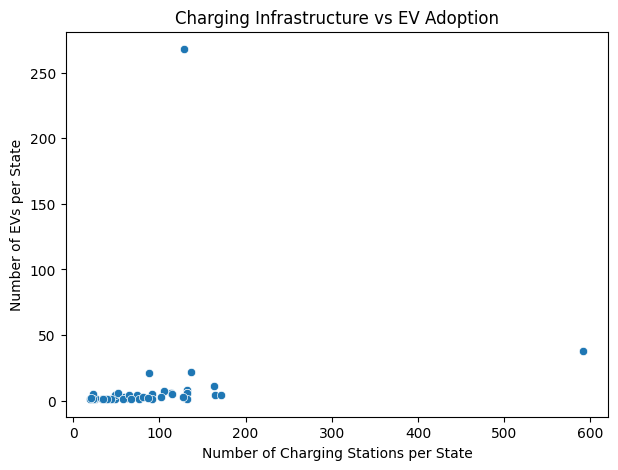

In [65]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged_df, x='station_count', y='EV_Count')
plt.title('Charging Infrastructure vs EV Adoption')
plt.xlabel('Number of Charging Stations per State')
plt.ylabel('Number of EVs per State')
plt.show()


# Correlation Heatmap

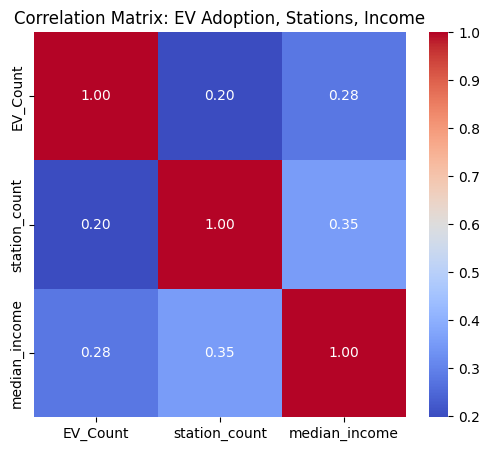

In [66]:
plt.figure(figsize=(6,5))
corr = merged_df[['EV_Count', 'station_count', 'median_income']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: EV Adoption, Stations, Income')
plt.show()
